In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("../dataset/data.csv", encoding='unicode_escape')

data = data.dropna(subset=['CustomerID'])

data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Weekday'] = data['InvoiceDate'].dt.weekday
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

data.describe(include='all'), data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   Year         397884 non-null  int32         
 9   Month        397884 non-null  int32         
 10  Weekday      397884 non-null  int32         
 11  TotalSales   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 34.9+ MB


(       InvoiceNo StockCode                         Description       Quantity  \
 count     397884    397884                              397884  397884.000000   
 unique     18532      3665                                3877            NaN   
 top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
 freq         542      2035                                2028            NaN   
 mean         NaN       NaN                                 NaN      12.988238   
 min          NaN       NaN                                 NaN       1.000000   
 25%          NaN       NaN                                 NaN       2.000000   
 50%          NaN       NaN                                 NaN       6.000000   
 75%          NaN       NaN                                 NaN      12.000000   
 max          NaN       NaN                                 NaN   80995.000000   
 std          NaN       NaN                                 NaN     179.331775   
 
              

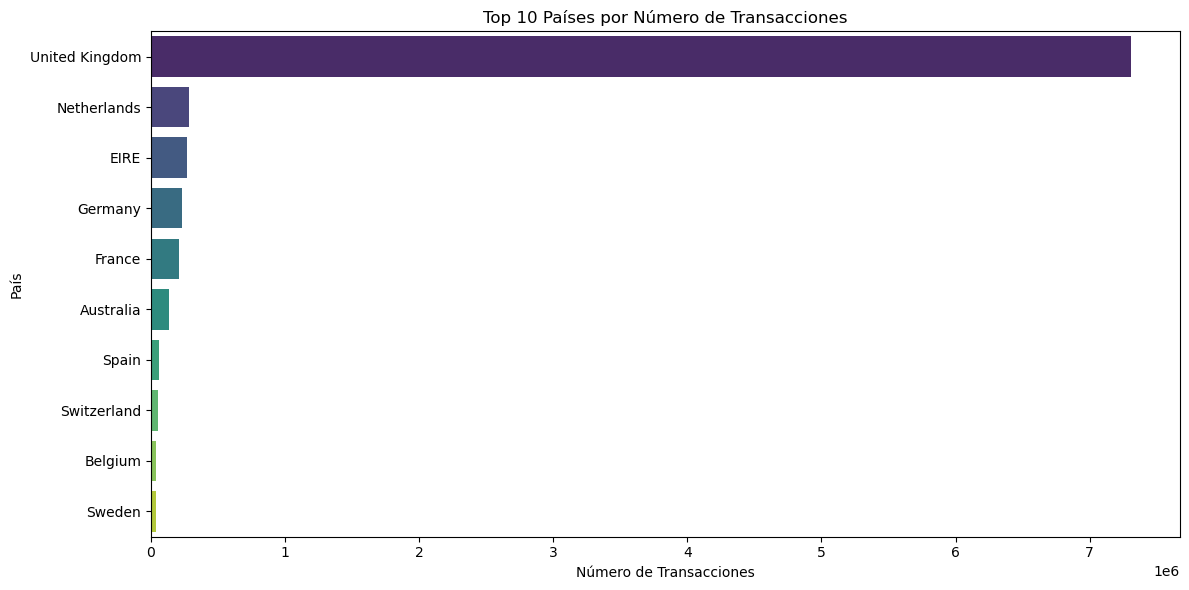

In [6]:
ventas_pais = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.barplot(x=ventas_pais.values, y=ventas_pais.index, ax=axes, palette='viridis')
axes.set_title('Top 10 Países por Número de Transacciones')
axes.set_xlabel('Número de Transacciones')
axes.set_ylabel('País')
plt.tight_layout()
plt.show()

C:\Users\franc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\franc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


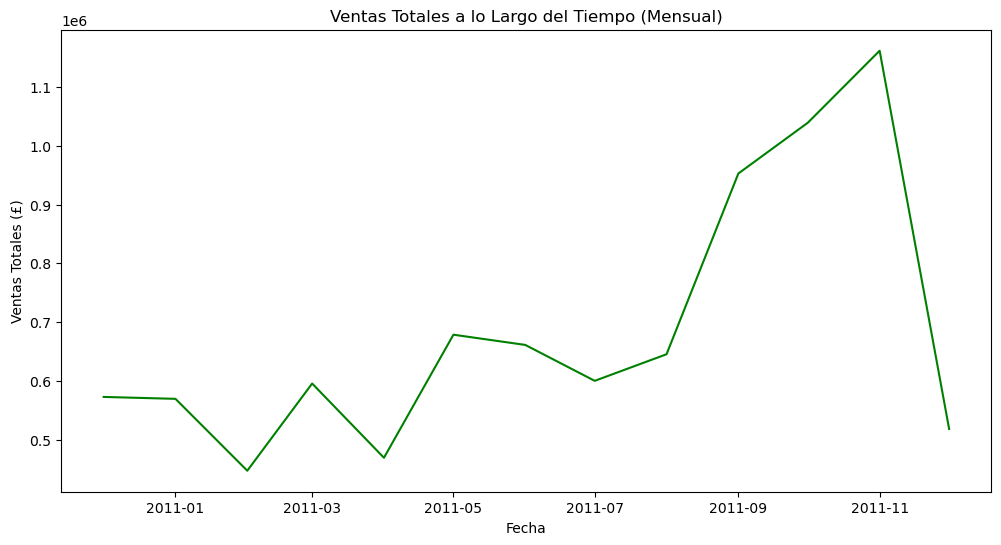

In [7]:
plt.figure(figsize=(12, 6))
data['MesAnho'] = data['InvoiceDate'].dt.to_period('M')
ventas_mensuales = data.groupby('MesAnho')['TotalSales'].sum()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()
sns.lineplot(x=ventas_mensuales.index, y=ventas_mensuales.values, color='green')
plt.title('Ventas Totales a lo Largo del Tiempo (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (£)')
plt.show()


<ipython-input-38-f08bbd0a18e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, ax=axes, palette='magma')


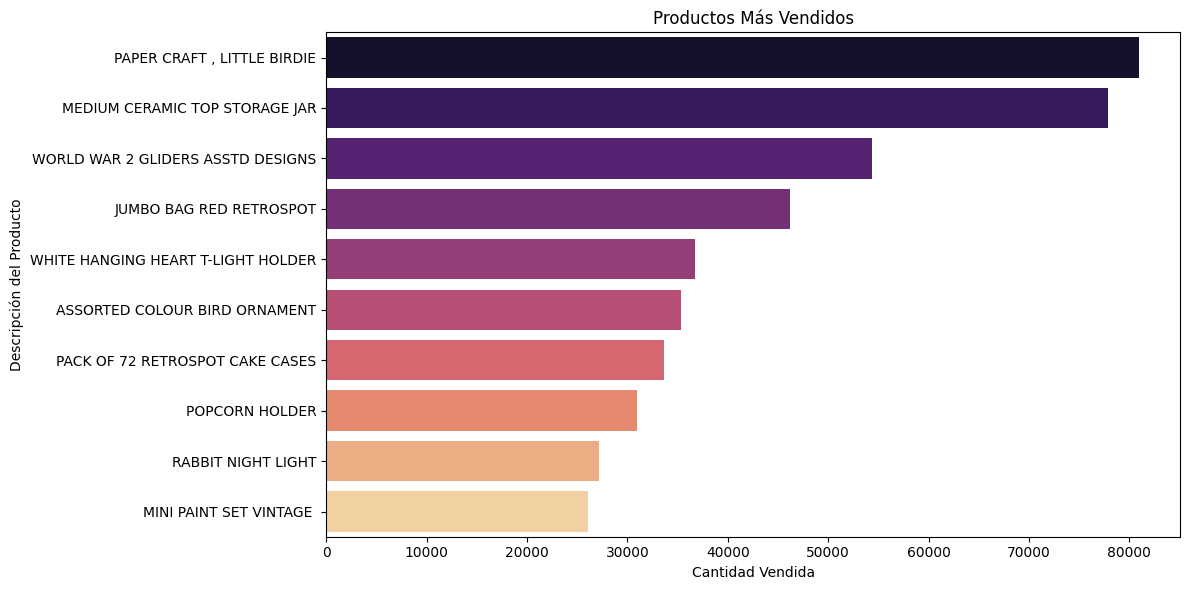

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, ax=axes, palette='magma')
axes.set_title('Productos Más Vendidos')
axes.set_xlabel('Cantidad Vendida')
axes.set_ylabel('Descripción del Producto')
plt.tight_layout()
plt.show()

<ipython-input-36-658cf114b2c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_dia_semanal.index, y=ventas_dia_semanal.values, ax=axes, palette='cool')


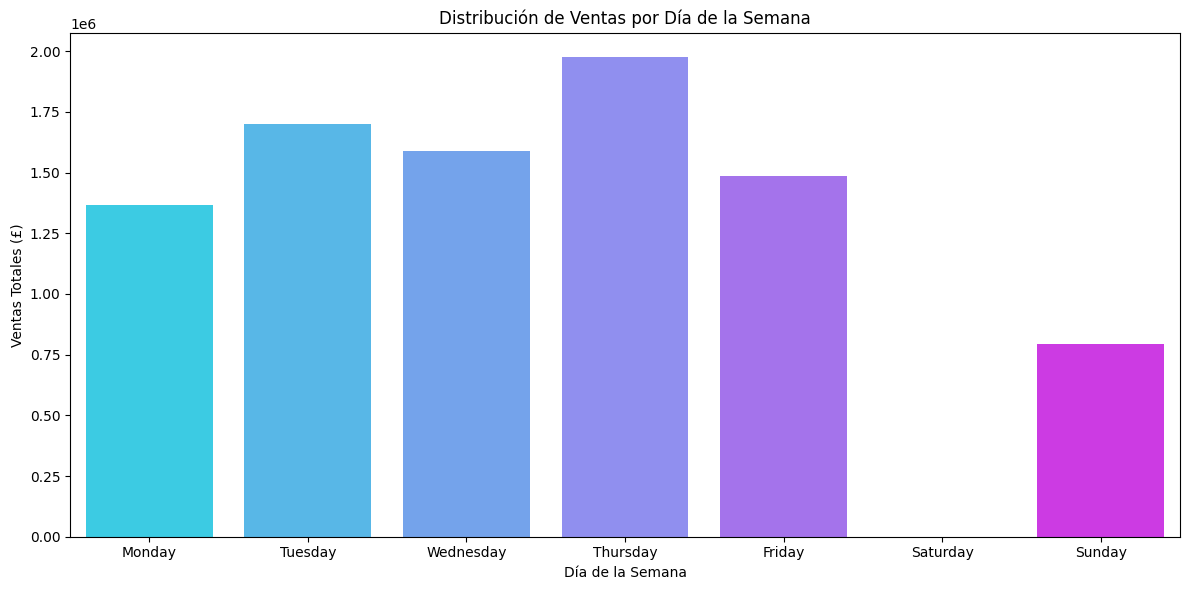

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
data['DiaSemana'] = data['InvoiceDate'].dt.day_name()
ventas_dia_semanal = data.groupby('DiaSemana')['TotalSales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=ventas_dia_semanal.index, y=ventas_dia_semanal.values, ax=axes, palette='cool')
axes.set_title('Distribución de Ventas por Día de la Semana')
axes.set_xlabel('Día de la Semana')
axes.set_ylabel('Ventas Totales (£)')
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# data_for_transform = data_cleaned[['StockCode', 'Quantity', 'UnitPrice']].head(1000)

# pipeline = ColumnTransformer(transformers=[
#     ('stock_ohe', OneHotEncoder(handle_unknown='ignore'), ['StockCode']),
#     ('num', StandardScaler(), ['Quantity', 'UnitPrice'])
# ])

# transformed_data = pipeline.fit_transform(data_for_transform)

# transformed_data.shape, transformed_data
